In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.optimize import least_squares, curve_fit

%matplotlib inline

workdir = '/mnt/e/GitHub_Design/DesignScript/BindingKd/vel_nir_mef_Kd_UV_raw_data/'

data = pd.read_csv(workdir + '20230512_nir2uM_titri.csv') #data from UV-vis-cd
for name in data.columns[2:]:
    x = data[name][450-250:550-250]  - data[data.columns[1]][450-250:550-250]
    y = sum(x)/len(x)
    data[name] = data[name] - y

abs_2uM = []
abs_2uM.append(data.iloc[317-250, 2])
for i in range(int(len(data.iloc[317-250, 3:])/2)):
    x = data.iloc[317-250, 3+i*2:3+i*2+2]
    abs_2uM.append(sum(x)/2)

abs_2uM_a = [data.iloc[317-250, 2]]
abs_2uM_a.extend(data.iloc[317-250, 3::2].tolist())
abs_2uM_b = [data.iloc[317-250, 2]]
abs_2uM_b.extend(data.iloc[317-250, 3+1::2].tolist())
print(data.iloc[317-250, 0])
print(len(abs_2uM))
print(abs_2uM_a)

data = pd.read_csv(workdir + '20230515_nir5uM_titri.csv') #data from UV-vis-300
# for name in data.columns[2:]:
#     x = data[name][450-250:550-250]  - data[data.columns[1]][450-250:550-250]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y

abs_5uM = []
abs_5uM.append(data.iloc[317-250, 2])
for i in range(int(len(data.iloc[317-250, 3:])/2)):
    x = data.iloc[317-250, 3+i*2:3+i*2+2]
    abs_5uM.append(sum(x)/2)

abs_5uM_a = [data.iloc[317-250, 2]]
abs_5uM_a.extend(data.iloc[317-250, 3::2].tolist())
abs_5uM_b = [data.iloc[317-250, 2]]
abs_5uM_b.extend(data.iloc[317-250, 3+1::2].tolist())
print(data.iloc[317-250, 0])
print(len(abs_5uM))
print(abs_5uM_a)

data = pd.read_csv(workdir + '20230512_nir10uM_titri.csv') #data from UV-vis-cd
for name in data.columns[2:]:
    x = data[name][450-250:550-250]  - data[data.columns[1]][450-250:550-250]
    y = sum(x)/len(x)
    data[name] = data[name] - y

abs_10uM = []
abs_10uM.append(data.iloc[317-250, 2])
for i in range(int(len(data.iloc[317-250, 3:])/2)):
    x = data.iloc[317-250, 3+i*2:3+i*2+2]
    abs_10uM.append(sum(x)/2)

abs_10uM_a = [data.iloc[317-250, 2]]
abs_10uM_a.extend(data.iloc[317-250, 3::2].tolist())
abs_10uM_b = [data.iloc[317-250, 2]]
abs_10uM_b.extend(data.iloc[317-250, 3+1::2].tolist())
print(data.iloc[317-250, 0])
print(len(abs_10uM))
print(abs_10uM_a)


317
18
[0.00054202052, 0.00791506799, 0.015337069220000003, 0.022025523999999998, 0.029033048940000004, 0.03534530296, 0.04121575659999999, 0.04737349098, 0.0534484393, 0.05968323999, 0.06495014353, 0.07697983524, 0.08850914786, 0.10044789785, 0.11141532609999999, 0.12282800778, 0.13401622079, 0.14597754803]
317
20
[-0.001916968, 0.01536745, 0.032961324, 0.05166344, 0.068797439, 0.084025197, 0.100109525, 0.116183996, 0.132288516, 0.145918533, 0.160714939, 0.189934954, 0.216805294, 0.245944828, 0.274732441, 0.3007994, 0.354052186, 0.408255935, 0.464001536, 0.570077777]
317
18
[0.0014810151900000001, 0.03726564106, 0.0720524238, 0.10711194535, 0.14193227055, 0.17465932629, 0.20712364974, 0.23727000864, 0.2677968704, 0.29794342435, 0.32756584235, 0.38436795485, 0.44136403375, 0.49684329455000004, 0.55488324875, 0.61074510095, 0.6679786447499999, 0.72453214315]


In [20]:
adds_2uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
conc_2uM = [x*600/(2000+x) for x in adds_2uM]
prot_conc_2uM = [2*2000/(2000+x) for x in adds_2uM]


adds_5uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 40]
conc_5uM = [x*1500/(2000+x) for x in adds_5uM]
prot_conc_5uM = [5*2000/(2000+x) for x in adds_5uM]

adds_10uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
conc_10uM = [x*3000/(2000+x) for x in adds_10uM]
prot_conc_10uM = [10*2000/(2000+x) for x in adds_10uM]

In [21]:
def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))


def res_float_nir(x):
    rs = []
    rs.extend(abs_2uM[i] - abs_2uM[0] - x[3]*conc_2uM[i] - x[0]*pl_stoich(2*2000/(2000+ adds_2uM[i]), conc_2uM[i], x[1], x[2]) for i in range(len(conc_2uM)) )
    rs.extend(abs_5uM[i] - abs_5uM[0] - x[4]*conc_5uM[i] - x[0]*pl_stoich(5*2000/(2000+ adds_5uM[i]), conc_5uM[i], x[1], x[2]) for i in range(len(conc_5uM)) )
#    rs.extend(abs_10uM[i] - abs_10uM[0] - x[5]*conc_10uM[i] - x[0]*pl_stoich(10*2000/(2000+ adds_10uM[i]), conc_10uM[i], x[1], x[2]) for i in range(len(conc_10uM)) )
    return rs


In [22]:
#res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001), (.01,50,3, .1,.1)])

x = res_nir.x  # fit parameters
x_orig = x

print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_orig[0],
      '\nKd (uM)=', x_orig[1],
      '\nN(stoichiometry)=', x_orig[2],
      '\nEpsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_orig[3],
      '\nEpsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_orig[4],
     # '\nEpsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_orig[5],
      )

#How to compute standard deviation errors.
#https://stackoverflow.com/questions/42388139/how-to-compute-standard-deviation-errors-with-scipy-optimize-least-squares
print(res_nir.x)

# J = res_nir.jac
# cov = np.linalg.inv(J.T.dot(J))
# var = np.sqrt(np.diagonal(cov))
# print(var)

# import scipy.linalg as linalg
# U, s, Vh = linalg.svd(res_nir.jac, full_matrices=False)
# tol = np.finfo(float).eps*s[0]*max(res_nir.jac.shape)
# w = s > tol
# cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
# cov = linalg.inv(res_nir.jac.T @ res_nir.jac)  
# perr = np.sqrt(np.diag(cov))  
# print(perr)

# chi2dof = np.sum(res_nir.fun**2)/(res_nir.fun.size - res_nir.x.size)
# cov *= chi2dof
# perr = np.sqrt(np.diag(cov)) 
# print(perr)

Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 0.006262764566063105 
Kd (uM)= 0.630591165231949 
N(stoichiometry)= 1.0444378462017219 
Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.018878720055337677 
Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.018463213918382945
[0.00626276 0.63059117 1.04443785 0.01887872 0.01846321]


([<matplotlib.axis.XTick at 0x7fe25eafc880>,
 <a list of 5 Text major ticklabel objects>)

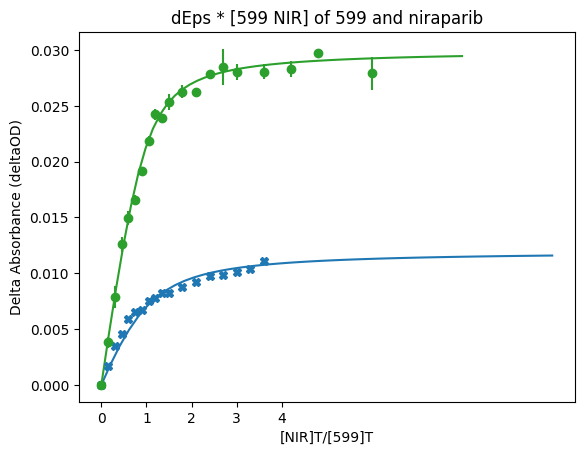

In [23]:
dePL_2 = [abs_2uM[i] - abs_2uM[0] - x[3] * conc_2uM[i] for i in range(len(conc_2uM))]
dePL_5 = [abs_5uM[i] - abs_5uM[0] - x[4] * conc_5uM[i] for i in range(len(conc_5uM))]
#dePL_10 = [abs_10uM[i] - abs_10uM[0] - x[5] * conc_10uM[i] for i in range(len(conc_10uM))]

dePL_2_a = [abs_2uM_a[i] - abs_2uM_a[0] - x[3] * conc_2uM[i] for i in range(len(conc_2uM))]
dePL_2_b = [abs_2uM_b[i] - abs_2uM_b[0] - x[3] * conc_2uM[i] for i in range(len(conc_2uM))]
dePL_2_std = [statistics.stdev([dePL_2_a[i], dePL_2_b[i]]) for i in range(len(conc_2uM))]

dePL_5_a = [abs_5uM_a[i] - abs_5uM_a[0] - x[3] * conc_5uM[i] for i in range(len(conc_5uM))]
dePL_5_b = [abs_5uM_b[i] - abs_5uM_b[0] - x[3] * conc_5uM[i] for i in range(len(conc_5uM))]
dePL_5_std = [statistics.stdev([dePL_5_a[i], dePL_5_b[i]]) for i in range(len(conc_5uM))]

plt.figure()
#plt.plot([600*add/(2*2000) for add in adds_2uM], dePL_2, 'o', label='[ABLER]T = 2 uM', color='tab:green')
#plt.plot([1500*add/(5*2000) for add in adds_5uM], dePL_5, 's', label='[ABLER]T = 5 uM', color='tab:orange')

ratio_2 = [600*add/(2000*2) for add in adds_2uM]
ratio_5 = [1500*add/(2000*5) for add in adds_5uM]
plt.errorbar(ratio_2, dePL_2, yerr= dePL_2_std, fmt='X', label='[ABLER]T = 2 uM', color='tab:blue')
plt.errorbar(ratio_5, dePL_5, yerr= dePL_5_std, fmt='o', label='[ABLER]T = 5 uM', color='tab:green')
#plt.plot([3000*add/(500*40) for add in adds_10uM], dePL_10, 'X', label='[ABLER]T = 10 uM')

fit_dePL_2 = [x[0] * pl_stoich(2, np.linspace(0,20,50)[i], x[1], x[2]) for i in range(50)]
fit_dePL_5 = [x[0] * pl_stoich(5, np.linspace(0,40,50)[i], x[1], x[2]) for i in range(50)]
#fit_dePL_10 = [x[0] * pl_stoich(10, np.linspace(0,80,50)[i], x[1], x[2]) for i in range(50)]

fit_2x = [c/2 for c in np.linspace(0,20,50)]
fit_5x = [c/5 for c in np.linspace(0,40,50)]
plt.plot(fit_2x, fit_dePL_2, color='tab:blue')
plt.plot(fit_5x, fit_dePL_5, color='tab:green')
#plt.plot([c/10 for c in np.linspace(0,80,50)], fit_dePL_10, color='tab:blue')

plt.xlabel('[NIR]T/[599]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [599 NIR] of 599 and niraparib')
plt.xticks(list(range(5)))

In [24]:
#write data files for GraphPad.
import os
outdir = workdir + 'processed_data/'
os.makedirs(outdir, exist_ok=True)
with open(outdir + 'nir_processed.tsv', 'w') as f:
    f.write('ratio2\t')
    f.write('\t'.join([str(round(x, 6)) for x in ratio_2]) + '\n')
    f.write('delta2\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_2]) + '\n')
    f.write('std2\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_2_std]) + '\n')

    f.write('ratio5\t')
    f.write('\t'.join([str(round(x, 6)) for x in ratio_5]) + '\n')
    f.write('delta5\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_5]) + '\n')
    f.write('std5\t')
    f.write('\t'.join([str(round(x, 6)) for x in dePL_5_std]) + '\n')

    f.write('fit_2_x\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_2x]) + '\n')
    f.write('fit_2_y\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_dePL_2]) + '\n')

    f.write('fit_5_x\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_5x]) + '\n')
    f.write('fit_5_y\t')
    f.write('\t'.join([str(round(x, 6)) for x in fit_dePL_5]) + '\n')
